<a href="https://colab.research.google.com/github/tejvirus0003/mypynb/blob/main/Assignment_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:
https://github.com/Shreyakkk/Email-Spam-Detector/blob/master/spam.csv
1.	Based on the dataset above, perform binary classification problem for email spam detection using Support Vector Machine (SVM) based machine Learning classification model.
2.	Check how performance varies with different types of Kernels
3.	Also check if the decision boundary changes with change in kernels

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyakkk/Email-Spam-Detector/master/spam.csv')

In [3]:
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3> here svm can be used to find the label but the main thing is how ?? </h3>
<b>first of all , we need to change the type of data , email text.. </b>
    
In our model , the model should see whether a email contains a text such that email has some certain words like profit , sale etc. which help us in saying whether it is a spam or not.

In [4]:
len(df)

5572

In [5]:
df.isna().sum()
#no missing values :)

Label        0
EmailText    0
dtype: int64

In [6]:
for i in range(len(df)):
    if df['Label'][i] == 'ham':
        df['Label'][i] = 0
    else :
        df['Label'][i]= 1
#label encoding manually

In [7]:
df.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
uniquewords = set()
type(uniquewords)

set

In [9]:
for i in range(len(df)):
    email = df['EmailText'][i].split()
    for j in email:
        uniquewords.add(j)    

In [10]:
len(uniquewords)

15585

In [11]:
for i in uniquewords:
    df[i]=0

In [12]:
df.head()

,Label,EmailText,dating:i,derek,Hmmm.still,location,chosen,login,"Hello,",;),U!U,"CRAZYIN,",black..and,cinema.,"chat.\""""",36504,guilty...,m8?,worry,disasters,IWANA,perfect,mins/texts.,Lool!,Thts,DATEBox1282EssexCM61XN,different,Howda,times.,Night,"baby,",nursery!,blur,Close,iZ,POBox365O4W45WQ,plate.,ar?,"slave,",TEXTS!,...,Mmmmmmm,09061749602,"Tunde,",staring,news,synced,torture,don't,txt,popped,FREE>Ringtone!Reply,port,simulate,film,canal.,machi?any,None,Christmas!,theKingshead,pain.,"smile,",yours!,GIMMI,London,afternoon,quick,IG11,ah.the,K:)k..its,-msg,Street,"me.\""...",favorite,of,anything.,kano;-),Theyre,(You,sea,crashing
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
for i in range(len(df)):
    jk = df['EmailText'][i].split()
    for j in jk:
        df[j][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
df.drop(['EmailText'] ,axis=1 ,inplace=True)

In [15]:
df.head()

,Label,dating:i,derek,Hmmm.still,location,chosen,login,"Hello,",;),U!U,"CRAZYIN,",black..and,cinema.,"chat.\""""",36504,guilty...,m8?,worry,disasters,IWANA,perfect,mins/texts.,Lool!,Thts,DATEBox1282EssexCM61XN,different,Howda,times.,Night,"baby,",nursery!,blur,Close,iZ,POBox365O4W45WQ,plate.,ar?,"slave,",TEXTS!,percent,...,Mmmmmmm,09061749602,"Tunde,",staring,news,synced,torture,don't,txt,popped,FREE>Ringtone!Reply,port,simulate,film,canal.,machi?any,None,Christmas!,theKingshead,pain.,"smile,",yours!,GIMMI,London,afternoon,quick,IG11,ah.the,K:)k..its,-msg,Street,"me.\""...",favorite,of,anything.,kano;-),Theyre,(You,sea,crashing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
Y = df['Label']

In [17]:
X = df.drop('Label' , axis=1)

In [18]:
X

,dating:i,derek,Hmmm.still,location,chosen,login,"Hello,",;),U!U,"CRAZYIN,",black..and,cinema.,"chat.\""""",36504,guilty...,m8?,worry,disasters,IWANA,perfect,mins/texts.,Lool!,Thts,DATEBox1282EssexCM61XN,different,Howda,times.,Night,"baby,",nursery!,blur,Close,iZ,POBox365O4W45WQ,plate.,ar?,"slave,",TEXTS!,percent,rakhesh,...,Mmmmmmm,09061749602,"Tunde,",staring,news,synced,torture,don't,txt,popped,FREE>Ringtone!Reply,port,simulate,film,canal.,machi?any,None,Christmas!,theKingshead,pain.,"smile,",yours!,GIMMI,London,afternoon,quick,IG11,ah.the,K:)k..its,-msg,Street,"me.\""...",favorite,of,anything.,kano;-),Theyre,(You,sea,crashing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
type(Y)

pandas.core.series.Series

In [20]:
Y=Y.astype(int)

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25)

In [22]:
len(X_train)

4179

In [23]:
len(X_test)

1393

In [24]:
from sklearn.svm import SVC

In [25]:
classifier = SVC(kernel='linear')

In [26]:
classifier.fit(X_train , Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
classifier.score(X_test , Y_test)

0.9820531227566404

In [28]:
#now lets change kernel one by one and see the accuracy but before that lets build the confusion matrix of above

In [29]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report , confusion_matrix

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
classification_report(Y_test , Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1211\n           1       0.99      0.87      0.93       182\n\n    accuracy                           0.98      1393\n   macro avg       0.98      0.94      0.96      1393\nweighted avg       0.98      0.98      0.98      1393\n'

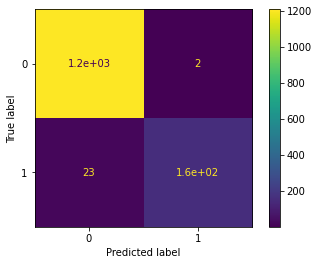

In [32]:
cum = confusion_matrix(Y_test , Y_pred)
matrix = ConfusionMatrixDisplay(cum , display_labels=classifier.classes_)
matrix.plot()

In [33]:
import seaborn as sn


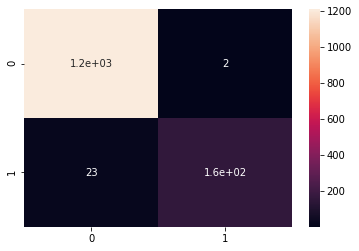

In [34]:
sn.heatmap(cum , annot=True)

In [35]:
##

**Changing Kernels**

Types of kernels are : <br>
Linear kernel (already done) <br>
Polynomial Kernel ( poly ) <br>
Gaussian Kernel <br>
sigmoid kernel <br>

In [36]:
model2 = SVC(kernel='poly')
model2.fit(X_train , Y_train)

KeyboardInterrupt: ignored

In [ ]:
model3 = SVC(kernel='rbf')
model3.fit(X_train , Y_train)

In [ ]:
model4 = SVC(kernel='sigmoid')
model4.fit(X_train , Y_train)

In [ ]:
model2.score(X_test , Y_test)

In [ ]:
model3.score(X_test , Y_test)

In [ ]:
model4.score(X_test , Y_test)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreyakkk/Email-Spam-Detector/master/spam.csv')

In [ ]:
df.Label=df.Label.replace({'spam':1,'ham':0})


In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
counts_1=vector.fit_transform(x_train)
counts_2=vector.transform(x_test)

In [ ]:
counts_1.toarray().shape

In [ ]:
x_test_up.toarray()

In [ ]:
x_train_up

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(x_train_up,y_train)
ans_k2=clf.predict(x_test_up)
print(classification_report(y_test,ans_k2))


In [ ]:
cum = confusion_matrix(x_test_up , ans_k2)
sn.heatmap(cum , annot=True)

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='poly')
clf.fit(x_train_up,y_train)
ans_k2=clf.predict(x_test_up)
print(classification_report(y_test,ans_k2))


In [ ]:
cum = confusion_matrix(x_test_up , ans_k2)
sn.heatmap(cum , annot=True)

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(x_train_up,y_train)
ans_k2=clf.predict(x_test_up)
print(classification_report(y_test,ans_k2))


In [ ]:
cum = confusion_matrix(x_test_up , ans_k2)
sn.heatmap(cum , annot=True)

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='sigmoid')
clf.fit(x_train_up,y_train)
ans_k2=clf.predict(x_test_up)
print(classification_report(y_test,ans_k2))


In [ ]:
cum = confusion_matrix(x_test_up , ans_k2)
sn.heatmap(cum , annot=True)